## Speech Recognition

### Speech To Text(STT)

- STT는 음성을 입력받아 그에 해당하는 구문(문자열)을 얻는 기술
- 딥러닝을 이용한 STT모델에는 WaveNet 등이 존재한다.
- SpeechRecognition을 이용하면 모델을 학습시키지 않고도 간편하게 구현할 수 있다.

### Library

- 음성 인식 기술은 음성 데이터가 대부분 크고, 관련 기술 코드도 상당히 길어 구현이 힘든 편이다.
- SpeechRecognition을 사용하면 이러한 과정 없이 음성 인식 기술을 이용할 수 있음

In [1]:
!pip install SpeechRecognition

### Recognizer
- SpeechRecognition 라이브러리의 기능을 이용하기 위해선 Recognizer객체를 생성

In [2]:
import speech_recognition as sr

r = sr.Recognizer()

- 여러 기업에서 제공하는 음성 인식 기술을 사용할 수 있다.
    + `recognize_google()` : Google Web Speech API
    + `recognize_google_cloud()` : Google Cloud Speech
    + `recognize_bing()` : Microsoft Bing Speech
    + `recognize_houndify()` : SoundHound Houndify
    + `recognize_ibm()` : IBM Speech to Text
    + `recognize_wit()` : Wit.ai
    + `recognize_sphinx()` : CMU Sphinx(Sphinx는 오프라인으로 동작하며, 나머지 모든 함수는 인터넷 연결이 되어야만 사용 가능)

### 음성데이터
- SpeechRecognition 지원 파일 형식
    + WAV
    + AIFF
    + AIFF-C
    + FLAC

- OpenSpeechRepository에서 제공하는 Havard Sentence 데이터 사용
    + http://www.voiptroubleshooter.com/open_speech/
- SpeechRecognition을 사용하기 위해 데이터를 AudioFile 객체로 변환

22050


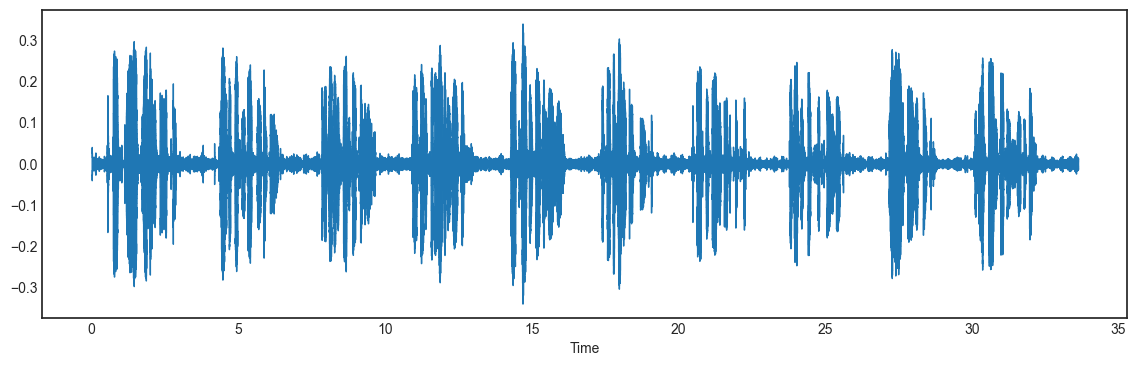

In [7]:
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-white")

fig = plt.figure(figsize=(14, 4))
american_wav, rate = librosa.core.load("./american.wav") # rate : wav의 샘플링 속도 혹은 비트 속도를 나타낸다.
                                                         # 높을수록 더 정교한 음성 데이터이다.
librosa.display.waveshow(american_wav, sr=rate)

ipd.Audio(american_wav, rate=rate)

### 영어(English)

- SpeechRecognition이 기본으로 지원하는 언어
- STT를 구현하기 위해선 먼저 recognizer의 record 함수를 이용해 데이터를 입력
- recognize를 이용해 각 기업에서 제공하는 api를 통해 음성에 해당하는 구문을 얻을 수 있음

### Language

- en-US : 영어
- zh-CN : 중국어
- fr-FR : 프랑스어
- ko-KR : 한국어

In [8]:
american_audio = sr.AudioFile('./american.wav')

with american_audio as source:
    audio = r.record(source)
    
r.recognize_google(audio_data=audio, language='en-US')

'the birds canoe slid on the smooth planks glue the sheet to the dark blue background it is easy to tell the depth of a well these days a chicken leg is a rare dish rice is often served in round Bowls the juice of lemons makes fine punch the box was thrown beside the park truck the Hogs are fed chopped corn and garbage 4 hours of study work face does a large size in stockings is hard to sell'

- record 함수를 사용할 때 duration을 지정하면 시작 지점에서 원하는 초만큼의 데이터만 입력 가능
- 지정된 음성에 대한 문자열만 얻는 것을 확인할 수 있다.

In [9]:
with american_audio as source:
    audio = r.record(source, duration=4)
    
r.recognize_google(audio_data=audio, language='en-US')

'the birds canoe slid on the smooth planks'

- offset을 지정하면 offset에 해당하는 초부터 데이터를 입력
- duration과 offset을 이용해 원하는 지점, 범위만큼 데이터 입력 가능
- 단, 앞뒤 데이터를 고려하는 특성 상 데이터를 일부만 입력하면 상대적으로 성능이 떨어질 수 있음
- 결과를 보면 같은 지점인데도 아까와는 다른 결과가 나오는 것을 확인할 수 있다.

In [12]:
with american_audio as source:
    audio = r.record(source, duration=8, offset=4)
    
r.recognize_google(audio_data=audio, language='en-US')

'glue the sheet to the dark blue background it is easy to tell the depth of a well'